<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week5(ii_b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Week 5(ii-b) - 03-05-2021
# 18071A0591

---




---


## II. Exemplify KNN (b) Diabetes Dataset


---

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/boosuro/diabetes_prediction_with_knn/master/diabetes.csv

--2021-05-03 09:16:37--  https://raw.githubusercontent.com/boosuro/diabetes_prediction_with_knn/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23106 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2021-05-03 09:16:38 (17.1 MB/s) - ‘diabetes.csv’ saved [23106/23106]



In [ ]:
diabetes = pd.read_csv('diabetes.csv')
# data.head()

In [ ]:
type(diabetes)

pandas.core.frame.DataFrame

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]

print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
import seaborn as sns

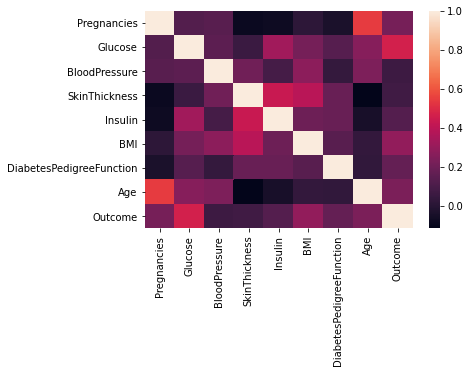

In [ ]:
sns.heatmap(diabetes.corr())


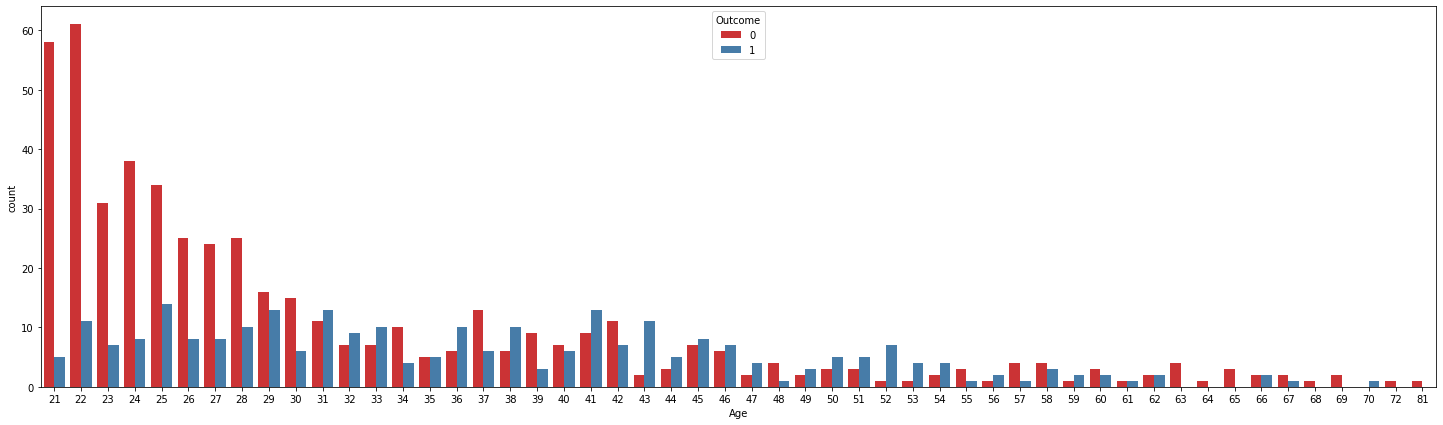

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=diabetes,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# FEATURE SCALING
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# With particularly K = 11, "Eucledian dist.", KNN Classifer and Score is as:
clf_knn = KNeighborsClassifier(n_neighbors=11, p=2, metric="euclidean")
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf_knn.predict(x_test)
print(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print("\n\nKNN Classifier Score:",score)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0]


KNN Classifier Score: 0.7662337662337663


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",conf_matrix)
print("\n F1 score:\n",f1_score(y_test,y_pred))


Confusion Matrix:
 [[130  22]
 [ 32  47]]

 F1 score:
 0.6351351351351351


In [ ]:
# With particularly K = 9, "Manhattan", KNN Classifer and Score is as:
clf_knn = KNeighborsClassifier(n_neighbors=9, p=2, metric="manhattan")
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=clf_knn.predict(x_test)
print(y_pred)
score = metrics.accuracy_score(y_test,y_pred)
print("\n\nKNN Classifier Score:",score)

[1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 1 0 0 0 0]


KNN Classifier Score: 0.7705627705627706


In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",conf_matrix)
print("\n F1 score:\n",f1_score(y_test,y_pred))


Confusion Matrix:
 [[132  20]
 [ 33  46]]

 F1 score:
 0.6344827586206897


In [ ]:
k_range = range(1,26)

In [ ]:
scores = {}
scores_list = []
for k in k_range:
        clf_knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
        clf_knn.fit(x_train,y_train)
        y_pred=clf_knn.predict(x_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
scores

{1: 0.6926406926406926,
 2: 0.7012987012987013,
 3: 0.7012987012987013,
 4: 0.70995670995671,
 5: 0.70995670995671,
 6: 0.7229437229437229,
 7: 0.7359307359307359,
 8: 0.7532467532467533,
 9: 0.7489177489177489,
 10: 0.7705627705627706,
 11: 0.7662337662337663,
 12: 0.7619047619047619,
 13: 0.7532467532467533,
 14: 0.7445887445887446,
 15: 0.7445887445887446,
 16: 0.7532467532467533,
 17: 0.7489177489177489,
 18: 0.7619047619047619,
 19: 0.7662337662337663,
 20: 0.7748917748917749,
 21: 0.7748917748917749,
 22: 0.7619047619047619,
 23: 0.7748917748917749,
 24: 0.7748917748917749,
 25: 0.7662337662337663}

Text(0, 0.5, 'Testing Accuracy')

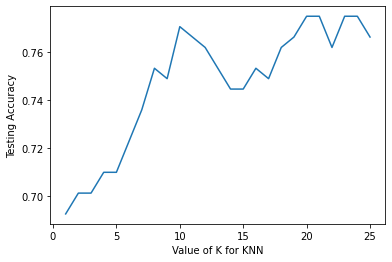

In [ ]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')